# Read in the data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files: #loop through to assign name of file as key and dataframe as content in a dictionary
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

# Read in the surveys

In [2]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
print(all_survey.head())
print(d75_survey.head())

      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p     ...      \
0         0.0           Elementary School   NaN    88    60     ...       
1         0.0           Elementary School   NaN   100    60     ...       
2         0.0           Elementary School   NaN    88    73     ...       
3         0.0  Elementary / Middle School  89.0    73    50     ...       
4         0.0           Elementary School   NaN   100    60     ...       

   s_N_q14e_3  s_N_q14e_4  s_N_q14f_1  s_N_q14f_2  s_N_q14f_3  s_N_q14f_4  \
0         NaN         NaN        

As we can see, both surveys have several columns. In the next step, we will concatenate these two dataframes and only pick out the columns that will be of use for us.

In [3]:
survey = pd.concat([all_survey, d75_survey], axis=0)

survey["DBN"] = survey["dbn"] #keeping the 'DBN' columns across datasets consistent

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

survey = survey.loc[:,survey_fields] #dropping columns that are not necessary
data["survey"] = survey #add to dictionary
data["survey"].head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


# Add DBN columns

All of our dataframes have DBNs except for "class_size". Fortunately, this dataframe contains enough information for us to create DBNs accordingly. We will create DBNs for all the dataframes, so that we can use the DBN label as the field name to join on when we combine all the dataframes into a single one.

In [4]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"] #keeping the 'DBN' columns across datasets consistent

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


# Convert SAT columns to numeric and add overall SAT scores

We will now convert numerical values that are in string types to integers. This will allow us to conduct some calculations on the SAT scores.

In [5]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")
data["sat_results"][cols].dtypes

SAT Math Avg. Score                float64
SAT Critical Reading Avg. Score    float64
SAT Writing Avg. Score             float64
dtype: object

In [6]:
#creating overall sat score column by adding the three columns
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


# Add longitude and latitude columns

We have longitude and latitude information in the "Location 1" column in the "hs_directory" dataframe. We will extract longitudes and latitudes, and use the coordinates to map out patterns using the Basemap package.

In [7]:
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

data["hs_directory"].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327,40.842414,-73.916162
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280,40.710679,-74.000807
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680,40.718810,-73.806500


# Condense datasets

In [8]:
data['class_size']['DBN'].value_counts()

15K429    57
09X517    56
09X505    56
21K690    52
15K448    52
10X243    51
25Q425    51
10X141    49
02M655    49
26Q430    49
08X405    47
25Q285    47
30Q445    47
20K490    47
21K525    46
14K586    46
22K405    46
31R440    46
31R455    46
31R460    46
01M292    45
22K495    45
30Q450    45
31R445    44
27Q400    44
10X368    44
14K071    44
27Q410    44
21K540    44
10X440    44
          ..
14K319     5
30Q222     5
09X449     5
31R074     5
13K301     5
05M317     5
09X002     5
02M413     5
10X079     4
03M417     4
20K748     4
01M364     4
20K310     4
24Q330     4
20K686     4
02M407     4
12X198     4
03M402     4
30Q280     4
04M964     3
27Q273     3
16K534     3
24Q290     3
02M397     3
20K264     3
03M452     3
20K971     3
02M267     2
09X090     2
27Q465     2
Name: DBN, Length: 1487, dtype: int64

There are multiple instance of each DBNs in the 'class_size' dataframe. Since we are going to use DBN as the unique field name to join on all the dataframes, we will calculate the average value of all the columns groubed by each unique DBN value.

In [9]:
class_size = data["class_size"]

#sorting out high school classes and general education programs
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(np.mean) #grouping schools by DBN and obtaining average values of columns
class_size.reset_index(inplace=True)
data["class_size"] = class_size
data["class_size"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


Non-numeric values are dropped here, which is fine since our analysis will mainly involve numbers.

In [10]:
print(data['demographics']['schoolyear'].unique())
print(data['graduation']['Cohort'].unique())
print(data['graduation']['Demographic'].unique())

[20052006 20062007 20072008 20082009 20092010 20102011 20112012]
['2003' '2004' '2005' '2006' '2006 Aug' '2001' '2002']
['Total Cohort' 'Male' 'English Language Learners'
 'English Proficient Students' 'Special Education Students'
 'General Education Students' 'Asian' 'Black' 'Hispanic' 'White' 'Female']


We can see that the most recent shool year captured in 'demographics' is 2011-2012. For the 'graduation' dataframe, it's 2006. We'll trim both datasets to only capture the most recent years in both dataframes. We'll also filter in 'Total Cohort' as the only accepted value within the 'Demographic' column of the 'graduation' dataframe to cover entire demographic in our analysis.

In [11]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012] #only 2011-2012 school year
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"] #latest cohort in graduation dataframe
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

# Convert AP scores to numeric

Similar to the SAT scores, we will convert AP scores to numeric values.

In [12]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
data['ap_2010'][cols].dtypes

AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

# Combine the datasets

Now we're ready to combine all the datasets. We will begin with 'sat_results' since it is a dataset that has unique DBN values. 'ap_2010' and 'graduation' will be merged with 'sat_results' by a left join, because 'sat_results' has more unique amount of DBNs than these two datasets.

In [13]:
#left join starting from "sat_results"
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%


For the remaining four datasets, we'll conduct an inner join to the 'combined' dataframe, since they all have more unique instances of DBNs than the 'combined' dataframe.

In [14]:
#inner join for the rest
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined = combined.fillna(combined.mean()) #filling in null values with average value
combined = combined.fillna(0) #filling in the rest of null values with 0
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


# Add a school district column for mapping

Now that we're done combining datasets, let's map out the average Safety and Respect scores for each of the districts. The surveys that were compiled previously obtained responses from students, parents and teachers on their perceptions on how safe and respectful their schools are. We'll see if there are any discrepencies in the opionions from these three groups.

In [15]:
#extracting school district numbers
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

In [16]:
#computing the average numerical values for each district to find average response scores and coordinates
districts = combined.groupby("school_dist").agg(np.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.949251


C:\Users\EunJin\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\EunJin\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


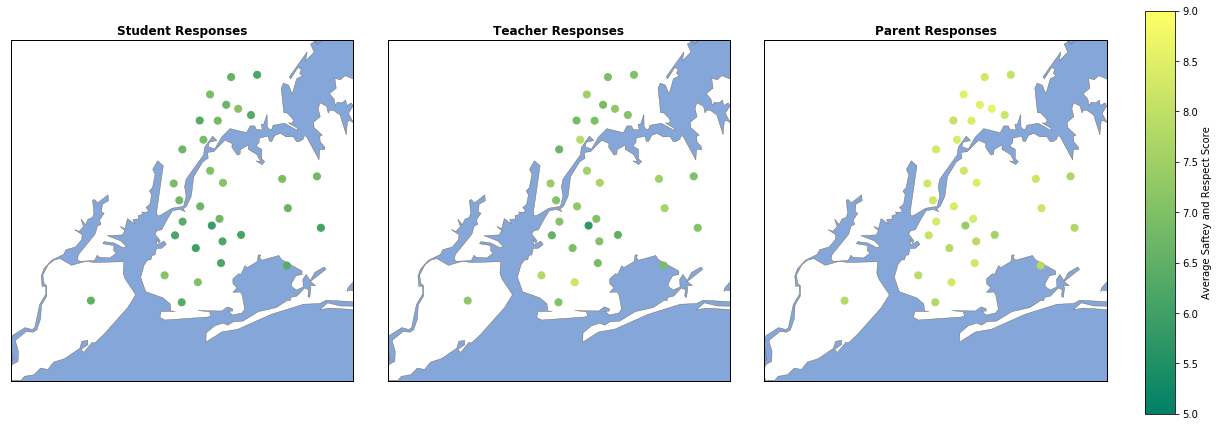

In [17]:
#creating a map of NY
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(21,7))
cols = ['saf_s_11', 'saf_t_11', 'saf_p_11']
titles = ['Student Responses', 'Teacher Responses', 'Parent Responses']

for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    m = Basemap(
        projection='merc', 
        llcrnrlat=40.496044, 
        urcrnrlat=40.915256, 
        llcrnrlon=-74.255735, 
        urcrnrlon=-73.700272,
        resolution='h',
    )

    m.drawmapboundary(fill_color='#85A6D9')
    m.drawcoastlines(color='#6D5F47', linewidth=.4)
    m.drawrivers(color='#6D5F47', linewidth=.4)
    m.fillcontinents(color='white',lake_color='#85A6D9')

    longitudes = districts["lon"].tolist()
    latitudes = districts["lat"].tolist()
    m.scatter(longitudes, latitudes, s=50, zorder=2, 
              latlon=True, c=districts[cols[i]], cmap="summer",
             vmin=5, vmax=9)
    ax.set_title(titles[i], fontweight='bold')

plt.subplots_adjust(right=0.85, wspace=0.1)
cax = plt.axes([0.875, 0.1, 0.02, 0.8])
plt.colorbar(label='Average Saftey and Respect Score', cax=cax)
plt.show()

A pattern can be seen across all districts in New York; it shows that there is a discrepency in the perception of school safety among students, teachers and parents. Students find their schools less safe and respectful than their parents. Teachers seem to have closer opinions with their students, but similar to the parents, they generally appear to find the schools safer and more respectful than their pupils. 

# Find correlations

We will now try to find correlations between the overall sat scores different variables in the combined dataset.

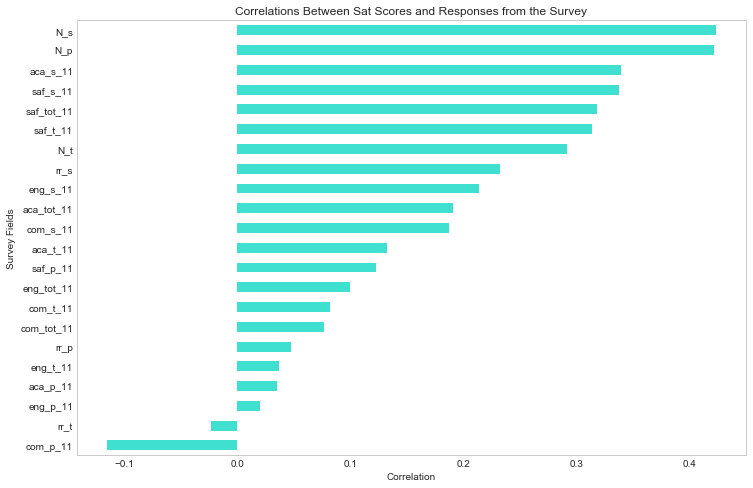

In [18]:
sns.set_style('whitegrid')
survey_fields.remove('DBN') #removing DBN from the list since no correlation exists between DBN values and SAT scores
correlations = combined.corr()
correlations = correlations["sat_score"]
ax = correlations[survey_fields].sort_values().plot.barh(figsize=(12,8), color='turquoise')
ax.set(title='Correlations Between Sat Scores and Responses from the Survey',
      xlabel='Correlation', ylabel='Survey Fields')
ax.grid(False)

There appears to be a positive relationship between the number of respondents from students, teachers and parents with SAT score. 

There also appear to be a weak positive relationship between safety and respect score from students and teachers, academic expectation scores based on student responses, and saftey and respect from all respondents. This leads us to understand that an unsafe and disrespectful learning environment might negatively affect SAT scores. Let's do some further investigation into this correlation.

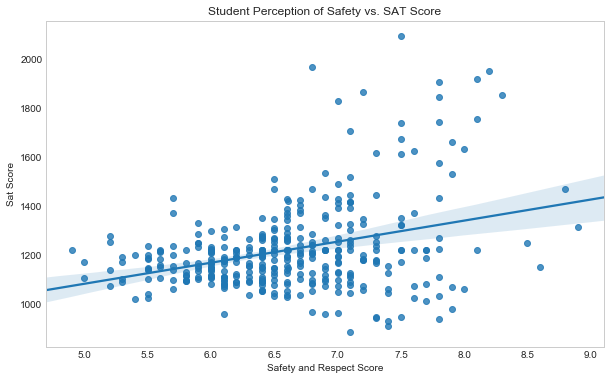

In [19]:
#creating a scatter plot of safety and respect scores from students and SAT score.
plt.figure(figsize=(10,6))
ax = sns.regplot(x="saf_s_11", y="sat_score", data=combined)
ax.set(title='Student Perception of Safety vs. SAT Score', ylabel='Sat Score',
      xlabel='Safety and Respect Score')
ax.grid(False)

There appears to be a positive relationship between SAF scores from students and average SAT scores. There are some datapoints that have scored average on SAT scores despite having high SAF scores.

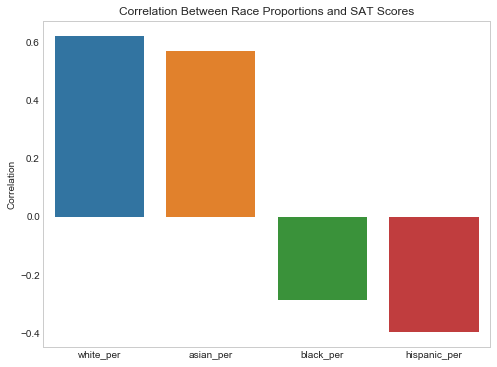

In [20]:
#Investigating racial differences in SAT scores
plt.figure(figsize=(8,6))
race_columns = ["white_per", "asian_per", "black_per",
               "hispanic_per"]
ax = sns.barplot(race_columns, correlations[race_columns].values)
ax.set(title='Correlation Between Race Proportions and SAT Scores',
      ylabel='Correlation')
ax.grid(False)

There is a high correlation of SAT scores and white and Asian students. There is a weak negative correlation between SAT scores and black and hispanic students. Let's create some scatterplots to see if any strong patterns show up.

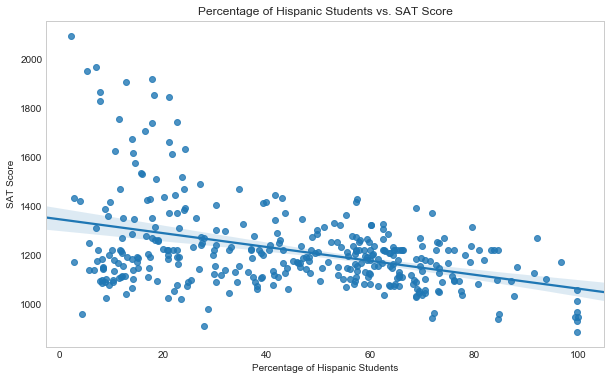

In [21]:
#explore schools with low SAT scores with high percentages of hispanic students
plt.figure(figsize=(10,6))
ax = sns.regplot('hispanic_per', 'sat_score', data=combined)
ax.set(title='Percentage of Hispanic Students vs. SAT Score',
      xlabel='Percentage of Hispanic Students', ylabel='SAT Score')
ax.grid(False)

There is a negative correlation between percentage of hispanic students in a school and SAT scores.

In [22]:
#finding schools with vast majority of students who are hispanic
high_hispanic = combined[combined["hispanic_per"] > 95]
high_hispanic["school_name"]

44                         Manhattan Bridges High School
82      Washington Heights Expeditionary Learning School
89     Gregorio Luperon High School for Science and M...
125                  Academy for Language and Technology
141                International School for Liberal Arts
176     Pan American International High School at Monroe
253                            Multicultural High School
286               Pan American International High School
Name: school_name, dtype: object

These schools mostly enrolled immigrant students who are still learning English. Since many of them are English learners and SAT requires students to know English well, we can see why there is a negative relationship between the percentage of Hispanic students and the overall SAT scores.

In [23]:
#finding schools with very low percentages of Hispanic students and high overall SAT scores
low_hispanic_sat = combined[combined["hispanic_per"] < 10]
low_hispanic_sat = low_hispanic_sat[low_hispanic_sat["sat_score"] > 1800]
low_hispanic_sat["school_name"]

37                                Stuyvesant High School
151                         Bronx High School of Science
187                       Brooklyn Technical High School
327    Queens High School for the Sciences at York Co...
356                  Staten Island Technical High School
Name: school_name, dtype: object

These are specialized schools that have entrance exams with high academic standards. Therefore, we can see that recently immigrated students may have a difficult time getting into these schools.

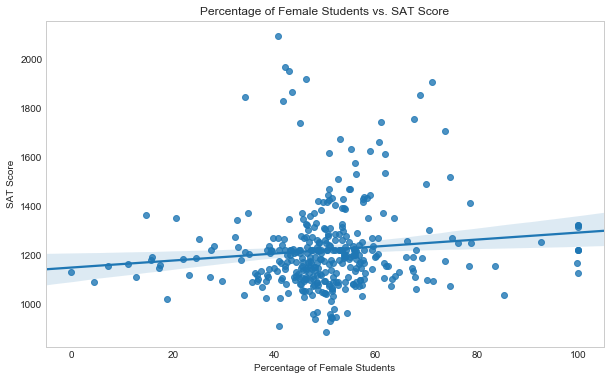

In [24]:
#investigating SAT scores and percentage of female students
plt.figure(figsize=(10,6))
ax = sns.regplot('female_per', 'sat_score', data=combined)
ax.set(title='Percentage of Female Students vs. SAT Score',
      xlabel='Percentage of Female Students', ylabel='SAT Score')
ax.grid(False)

By observing the scatter plot, we can see that there isn't a clear relationship between percentage of female students and SAT scores. There seems to be a few schools who have high SAT scores with lower percentages of female students and a few schools with high percentages of female students with high SAT scores.

In [25]:
#investigating high SAT scores with high percentage of female students
high_fem_sat = combined[combined["female_per"] > 60]
high_fem_sat = high_fem_sat[high_fem_sat["sat_score"] > 1700]
print(high_fem_sat["school_name"])

5                         Bard High School Early College
26                         Eleanor Roosevelt High School
60                                    Beacon High School
61     Fiorello H. LaGuardia High School of Music & A...
302                          Townsend Harris High School
Name: school_name, dtype: object


These are special and highly selective schools. They seem to focus on liberal arts and have high academic standards.

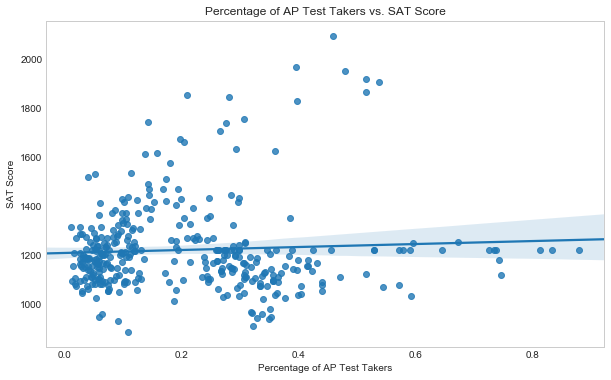

In [26]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]
plt.figure(figsize=(10,6))
ax = sns.regplot('ap_per', 'sat_score', data=combined)
ax.set(title='Percentage of AP Test Takers vs. SAT Score',
      xlabel='Percentage of AP Test Takers', ylabel='SAT Score')
ax.grid(False)

There isn't a relationship between the amount of AP Test takers and SAT Scores. There are some schools that have high average SAT scores as the percentage of AP exame takers rise. Then there is a group of schools that have similar average SAT scores desipte having increasing percentage of AP exam takers.